In [1]:
import chromadb
chroma_client = chromadb.Client()

In [2]:
chroma_client.get_collection('NFHS_Basketball_Rules')

InvalidCollectionException: Collection NFHS_Basketball_Rules does not exist.

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [4]:
import chromadb.utils.embedding_functions as embedding_functions

google_ef  = embedding_functions.GoogleGenerativeAiEmbeddingFunction(api_key=GOOGLE_API_KEY)



In [57]:
google_ef(['my name is willy wonka'])

[array([ 1.40515286e-02,  1.62135195e-02,  2.04528356e-03, -2.76012514e-02,
         7.55477622e-02,  3.06018200e-02,  5.48870452e-02,  1.09760556e-02,
         4.97538922e-03,  1.68337803e-02,  7.70022580e-03,  2.54417327e-03,
        -2.71941479e-02, -5.04519455e-02, -2.10025087e-02,  7.54769845e-03,
         3.92422155e-02, -6.38771686e-04,  1.26036229e-02, -5.33950403e-02,
        -1.31639866e-02,  7.75303401e-04,  6.61034501e-05, -1.70165822e-02,
        -1.01780836e-02,  2.21254211e-03,  4.03066836e-02, -4.89923730e-02,
        -2.77485643e-02,  4.12338749e-02, -1.63415018e-02,  2.26945356e-02,
        -5.31966686e-02, -8.23141355e-03,  2.28640959e-02, -2.63181180e-02,
        -1.03985155e-02, -1.56636760e-02, -8.23393185e-03,  3.67419864e-03,
        -1.05447331e-02, -4.17196229e-02, -1.24307685e-02, -5.84191419e-02,
         4.45519350e-02,  1.95363201e-02, -1.25480052e-02,  4.12975326e-02,
         1.90717150e-02, -1.08959071e-01,  4.58043143e-02, -8.17791151e-04,
         7.6

In [3]:
from pypdf import PdfReader

reader = PdfReader('./ncboa_rules.pdf')

reader.pages
text = " "
for i in reader.pages:
    text += ("\n" + i.extract_text())

In [7]:
reader.pages[0].extract_text()

''

In [3]:
import pymupdf

fname = "./Rules.pdf"  # get document filename
with pymupdf.open(fname) as doc:  # open document
    text2 = chr(12).join([page.get_text() for page in doc])

In [4]:
import re
test = re.sub(r'http\S+', '', text2)

In [5]:
test = re.sub("\\n", " ", test)
test = re.sub(r"cboa - san francisco peninsula", "", test)

In [5]:
import docx2txt
text = docx2txt.process('./ncboa rule book copy.docx')

text

'TOPIC I\n\nCOURT AND EQUIPMENT\n\n\n\nKEY TERMS\n\nThe playing court shall be a rectangular surface free from obstructions and dimensions not greater than 94 feet in length by 50 feet in width (1-1).\n\n\n\nThe frontcourt of a team consists of that part of the court between its end line and the nearer edge of the division line, including its basket and the inbounds part of the backboard (4-13-1). The backcourt of a team consists of the rest of the court, including the entire division line and the opponent\'s basket and inbounds part of the opponent\'s backboard (4-13-2).\n\n\n\nA team\'s own basket is the one into which players try to throw or tap the ball (4-5-1).\n\n\n\nBoundary lines of the court consist of end lines and sidelines (4-9-1). The inside edges of these lines define the inbounds and out-of-bounds areas (4-9-2).\n\n\n\nTOPIC: THE PLAYING COURT\n\nThe playing court shall be a rectangular surface free from obstructions and with dimensions not greater than 94 feet in length

In [6]:
rulebook_text = text.strip(); text.strip(); text.strip(); text.replace("\n", " ")


'TOPIC I  COURT AND EQUIPMENT    KEY TERMS  The playing court shall be a rectangular surface free from obstructions and dimensions not greater than 94 feet in length by 50 feet in width (1-1).    The frontcourt of a team consists of that part of the court between its end line and the nearer edge of the division line, including its basket and the inbounds part of the backboard (4-13-1). The backcourt of a team consists of the rest of the court, including the entire division line and the opponent\'s basket and inbounds part of the opponent\'s backboard (4-13-2).    A team\'s own basket is the one into which players try to throw or tap the ball (4-5-1).    Boundary lines of the court consist of end lines and sidelines (4-9-1). The inside edges of these lines define the inbounds and out-of-bounds areas (4-9-2).    TOPIC: THE PLAYING COURT  The playing court shall be a rectangular surface free from obstructions and with dimensions not greater than 94 feet in length by 50 feet in width. IDEA

In [7]:
rulebook_text = rulebook_text.replace("\n", " ")

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter




text_splitter = RecursiveCharacterTextSplitter(chunk_size=5000, chunk_overlap=200)
splits = text_splitter.split_text(rulebook_text)

In [9]:
rules_collection = chroma_client.create_collection('NFHS_Basketball_Rules', embedding_function=google_ef)

In [10]:
ids = [f'id{i}' for i in range(0, len(splits))]

In [11]:
rules_collection.add(documents=splits, ids=ids)

In [13]:
rules_collection.query(query_texts=['what is a considered a try'], n_results=2)

{'ids': [['id23', 'id85']],
 'embeddings': None,
 'documents': [["the floor. Therefore, no points are scored (4-41-2, 4, 5).    5.2.3 SITUATION: A1 completes the throw-in to A2 to begin the second half. A2 is confused and dribbles toward the basket Team A used during the first half and dunks the ball into the basket of Team B. RULING: Legal goal. Two points are awarded to Team B. The ball is bounced to a player of Team A out of bounds at the basket of Team B. Team A may put the ball in play from anywhere along the end line as after any score by B (earned or awarded) (5-2-1; 7-5-7).    TOPIC: TRY  A try for field goal is an attempt by a player to score two or three points by throwing the ball into a team's own basket (4-41-2). A team's own basket is the one into which its players try to throw or tap the ball (4-5-1).    The try starts when the player begins the motion which habitually precedes the release of the ball (4-41-3). The try ends when the throw is successful, when it is certai

In [43]:
inquiry = rules_collection.query(query_texts=['What is officials jurisdiction?'], n_results=2)
inquiry['documents']

[["completion of any reports, including those imposing disqualifications, which are responsive to actions occurring while the officials had jurisdiction. State associations may intercede in the event of unusual incidents after the official's jurisdiction has ended or in the event that a contest is terminated prior to the conclusion of regulation play.  RATIONALE  A state association may permit game or replay officials to utilize available replay equipment to determine the outcome of a state championship series game. Individual state associations will determine if the equipment will be used, at what tournament round(s) and by whom. This same technology is already being utilized after state contests by the media and being showcased on the internet. State administrators should also be permitted to use this same technology, if available and desired, to assist in making the correct call when the outcome of the game hangs in the balance and a team has no further opportunities to overcome a c

In [29]:
len(inquiry['documents'][0])

2

In [30]:
''.join(inquiry['documents'][0])

'the floor. Therefore, no points are scored (4-41-2, 4, 5).    5.2.3 SITUATION: A1 completes the throw-in to A2 to begin the second half. A2 is confused and dribbles toward the basket Team A used during the first half and dunks the ball into the basket of Team B. RULING: Legal goal. Two points are awarded to Team B. The ball is bounced to a player of Team A out of bounds at the basket of Team B. Team A may put the ball in play from anywhere along the end line as after any score by B (earned or awarded) (5-2-1; 7-5-7).    TOPIC: TRY  A try for field goal is an attempt by a player to score two or three points by throwing the ball into a team\'s own basket (4-41-2). A team\'s own basket is the one into which its players try to throw or tap the ball (4-5-1).    The try starts when the player begins the motion which habitually precedes the release of the ball (4-41-3). The try ends when the throw is successful, when it is certain the throw is unsuccessful, when the thrown ball touches the f

In [24]:
from functools import reduce
reduce(lambda x, y: x + y, inquiry['documents'])

["the floor. Therefore, no points are scored (4-41-2, 4, 5).    5.2.3 SITUATION: A1 completes the throw-in to A2 to begin the second half. A2 is confused and dribbles toward the basket Team A used during the first half and dunks the ball into the basket of Team B. RULING: Legal goal. Two points are awarded to Team B. The ball is bounced to a player of Team A out of bounds at the basket of Team B. Team A may put the ball in play from anywhere along the end line as after any score by B (earned or awarded) (5-2-1; 7-5-7).    TOPIC: TRY  A try for field goal is an attempt by a player to score two or three points by throwing the ball into a team's own basket (4-41-2). A team's own basket is the one into which its players try to throw or tap the ball (4-5-1).    The try starts when the player begins the motion which habitually precedes the release of the ball (4-41-3). The try ends when the throw is successful, when it is certain the throw is unsuccessful, when the thrown ball touches the fl

In [12]:
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(model='gpt-4o-mini')

In [13]:
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate

prompt_text = """
    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Be thorough in your answer and cite an relevant sections or rule numbers to support your answer.
    Human: {question} 
    Context: {context} 
    Assistant:
    """

prompt = ChatPromptTemplate.from_template(template=prompt_text
)

In [14]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document
from langgraph.checkpoint.memory import MemorySaver
from langchain import hub
#prompt = hub.pull("rlm/rag-prompt")

memory = MemorySaver()

class State(TypedDict):
    question: str
    context: list
    answer: str


# Define application steps
def retrieve(state: State):
    retrieved_docs = rules_collection.query(query_texts=[state["question"]], n_results=3)
    return {"context": retrieved_docs['documents']}


def generate(state: State):
    docs_content = ''.join(state["context"][0])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [15]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="\n    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Be thorough in your answer and cite an relevant sections or rule numbers to support your answer.\n    Human: {question} \n    Context: {context} \n    Assistant:\n    "), additional_kwargs={})])

In [16]:
from dotenv import load_dotenv
import os
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [17]:
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile(checkpointer=memory)   

In [18]:
config = {"configurable": {"thread_id": "1"}}
response = graph.invoke({"question": "what about after a tech is call?"}, config=config)
print(response["answer"])

After a technical foul is called, the implications depend on the context of the game and the specific situation that led to the foul. 

1. **General Consequences of a Technical Foul**: When a technical foul is assessed, the opposing team is awarded two free throws, and they will also retain possession of the ball for a division-line throw-in (as per the rules governing player technical fouls).

2. **Specific Situations**: In the context of player actions following a technical foul:
   - If a player is disqualified and is incorrectly allowed to participate despite their disqualification (like entering the game after a technical foul has been assessed due to prior infractions), the following outcomes apply:
      - If recognized before the ball becomes live, the player is directed to the bench without penalty (10.6.3 SITUATION B).
      - If recognized after the ball has become live, a technical foul is charged to the head coach, and the player must leave the game, with the opposing team

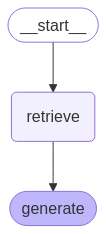

In [19]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [51]:
response

{'question': 'if a player bounces the ball and it goes in, does it count?',
 'context': [["inflated to an air pressure such that when it is dropped to the playing surface from a height of 6 feet, measured to the bottom of the ball, it shall rebound to a height, measured to the top of the ball, of not less than 49 inches when it strikes on its least resilient spot, nor more than 54 inches when it strikes on its most resilient spot (1-12-2).    The home team shall provide a ball which meets the specifications. The referee shall be the sole judge of the legality of the ball and may select a ball provided by the visiting team (1-12-3).    THE BALL: CASE PLAY  1.12.3 SITUATION: The game ball supplied by the home team does not have the NFHS Authenticating Mark. The visiting team does have a ball with the NFHS Authenticating Mark. Must the referee accept the visitor's approved ball for game use? RULING: Yes, the home team shall provide a ball that meets specifications in order for it to be us